# Transformada de Fourier 

In [208]:
from scipy.special import binom
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [45]:
im = cv2.imread('im1.jpg', 0)

In [207]:
# Transformada de Fourier de la imagen
imF = np.fft.fft2(im)
# Desplazamiento de la transformada de Fourier
imFShift = np.fft.fftshift(imF)
# Valor absoluto de la transformada
imFAbs = np.abs(imFShift)
# Logaritmo de la transformada
c = 255/np.max(imFAbs)
imFLog = c * np.log(imFAbs+1)

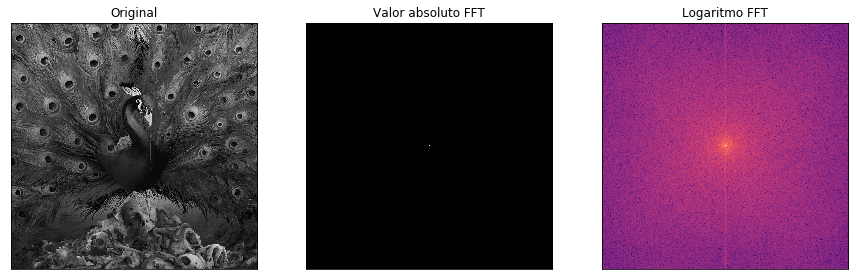

In [124]:
plt.figure(figsize=(15, 10))
plt.subplot(131)
plt.imshow(im, cmap='gray')
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(132)
plt.imshow(imFAbs, cmap='gray')
plt.title('Valor absoluto FFT')
plt.xticks([]), plt.yticks([])
plt.subplot(133)
plt.imshow(imFLog, cmap='magma')
plt.title('Logaritmo FFT')
plt.xticks([]), plt.yticks([])
plt.show()

### Filtro en frecuencia (bloques)

In [152]:
# Definicion del filtro de bloques
n = 11
h = 1/(n*n) * np.ones((n, n))

In [153]:
# Transformada de Fourier del filtro
hF = np.fft.fft2(h, im.shape)
H = np.fft.fftshift(hF)
H = np.abs(H)
H = np.log(H+1)

/home/sjkdm/anaconda3/envs/py36/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:676: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.fftn(a, s, axes)


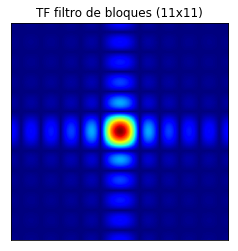

In [195]:
plt.figure()
plt.title('TF filtro de bloques (11x11)')
plt.imshow(H, cmap='jet')
plt.xticks([]), plt.yticks([])
plt.show()

In [155]:
# Filtrado de la imagen en el dominio de la frecuencia
FH = imF * hF

In [156]:
# Regresar al dominio espacial
im_filtered = np.fft.ifft2(FH)
im_filtered = np.uint8(np.abs(im_filtered))

In [157]:
# Transformada de Fourier de la imagen filtrada
im_fF = np.fft.fft2(im_filtered)
im_fF = np.fft.fftshift(im_fF)
im_fF = np.abs(im_fF)
im_fF = (255/np.max(im_fF)) * np.log(im_fF+1)

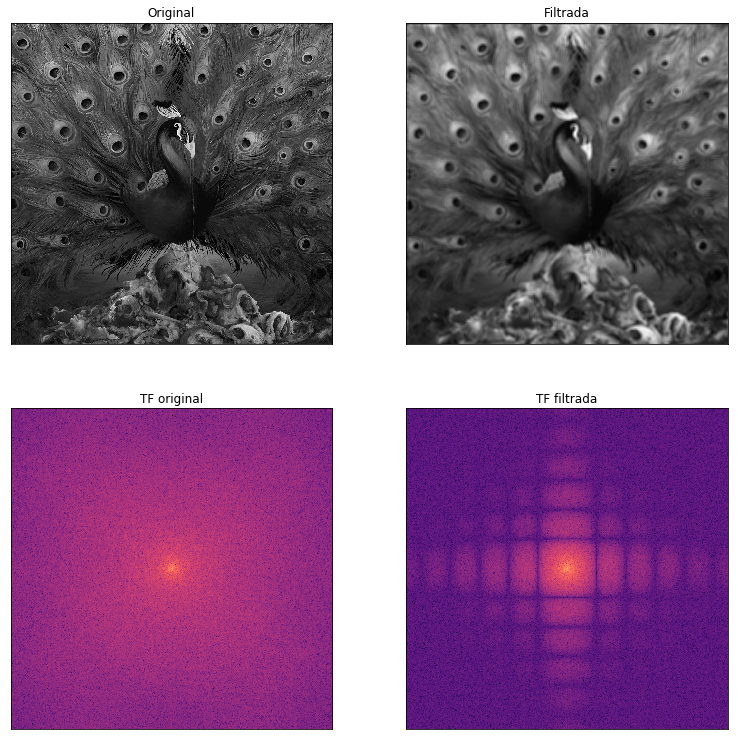

In [159]:
plt.figure(figsize=(13, 13))
plt.subplot(221)
plt.imshow(im, cmap='gray')
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222)
plt.imshow(np.abs(im_filtered), cmap='gray')
plt.title('Filtrada')
plt.xticks([]), plt.yticks([])
plt.subplot(223)
plt.imshow(imFLog, cmap='magma')
plt.title('TF original')
plt.xticks([]), plt.yticks([])
plt.subplot(224)
plt.imshow(im_fF, cmap='magma')
plt.title('TF filtrada')
plt.xticks([]), plt.yticks([])
plt.show()

### Filtrado en frecuencia (binomial)

In [183]:
def binomialFilter(n):
    binFilt = []
    for i in range(n):
        binFilt.append(int(binom(n-1, i)))
    binFilt = np.outer(binFilt, binFilt)
    binFilt = 1/np.sum(binFilt) * binFilt
    return binFilt

In [209]:
bf = binomialFilter(11)

In [210]:
F = np.fft.fft2(bf, im.shape)
Fi = np.fft.fftshift(F)
Fi = np.abs(Fi)
Fi = np.log(Fi+1)

/home/sjkdm/anaconda3/envs/py36/lib/python3.6/site-packages/mkl_fft/_numpy_fft.py:676: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  output = mkl_fft.fftn(a, s, axes)


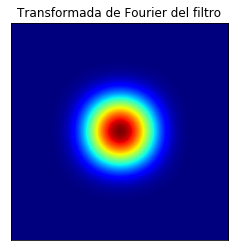

In [202]:
plt.figure()
plt.title('Transformada de Fourier del filtro')
plt.imshow(Fi, cmap='jet')
plt.xticks([]), plt.yticks([])
plt.show()

In [204]:
# Filtrado de la imagen en el dominio de la frecuencia
imFG = imF * F

In [206]:
# Regresar al dominio espacial
im_filterG = np.uint8(np.abs(np.fft.ifft2(imFG)))

In [211]:
# Transformada de Fourier de la imagen filtrada
im_fFG = np.fft.fft2(im_filterG)
im_fFG = np.fft.fftshift(im_fFG)
im_fFG = np.abs(im_fFG)
im_fFG = (255/np.max(im_fFG)) * np.log(im_fFG+1)

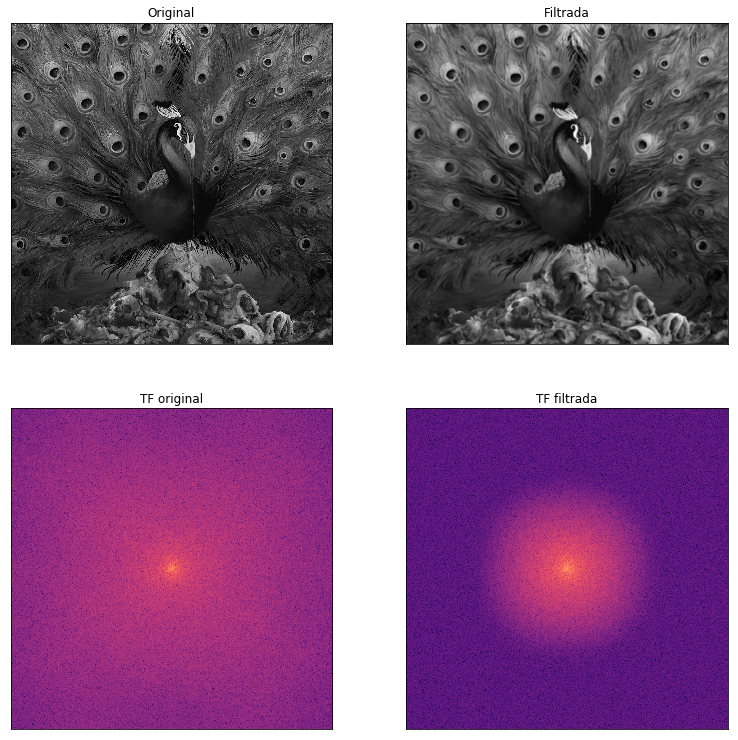

In [212]:
plt.figure(figsize=(13, 13))
plt.subplot(221)
plt.imshow(im, cmap='gray')
plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(222)
plt.imshow(im_filterG, cmap='gray')
plt.title('Filtrada')
plt.xticks([]), plt.yticks([])
plt.subplot(223)
plt.imshow(imFLog, cmap='magma')
plt.title('TF original')
plt.xticks([]), plt.yticks([])
plt.subplot(224)
plt.imshow(im_fFG, cmap='magma')
plt.title('TF filtrada')
plt.xticks([]), plt.yticks([])
plt.show()